**GRIP: The Sparks Foundation**

**Data Science and Business Analytics Internship**

**Author: Tamer Ahmed**

**Task 1: Prediction Using Supervised Machine Learning**

**In this task, I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.**


In [1]:
# Importing needed modules 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data using Pandas Module as a Dataframe
data = pd.read_csv('http://bit.ly/w-data')
# Printing the head 5 observations from our dataframe & shape:
print("The dataframe shape is: "+ str(data.shape))
data.head()

The dataframe shape is: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# I can get more information about data as the following:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# I can also describe data:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


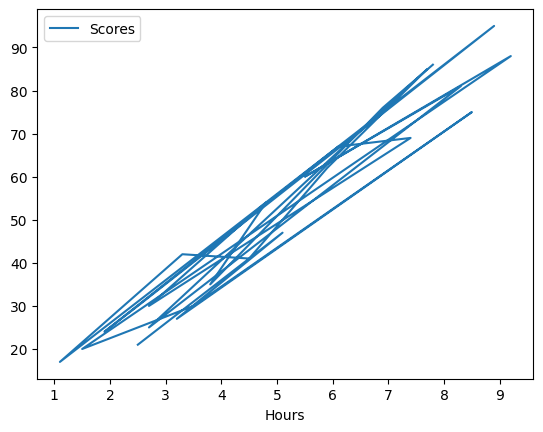

In [5]:
# Now I will use line plot to plot the two variables against each other:
data.plot(kind='line', x='Hours', y='Scores')
plt.show()

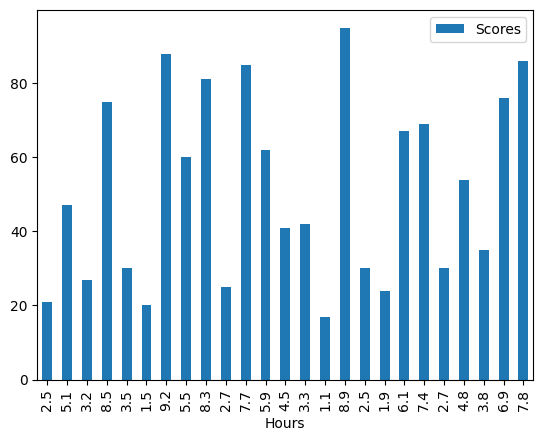

In [6]:
# Now I will use line plot to plot the two variables against 
#each other:
data.plot(kind='bar', x='Hours', y='Scores')
plt.show()

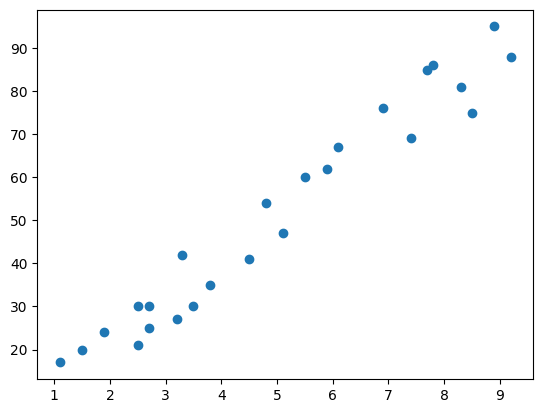

In [7]:
# Now we will use scatter plot to plot the two variables against 
#each other:
plt.scatter(x='Hours', y='Scores', data= data)
plt.show()

In [8]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Count'>

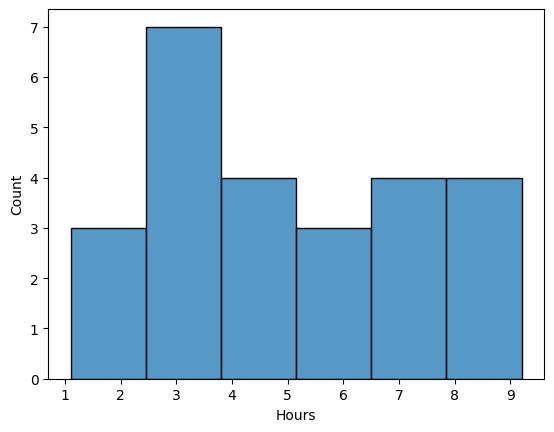

In [10]:
hours = data['Hours']
scores = data['Scores']
sns.histplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Count'>

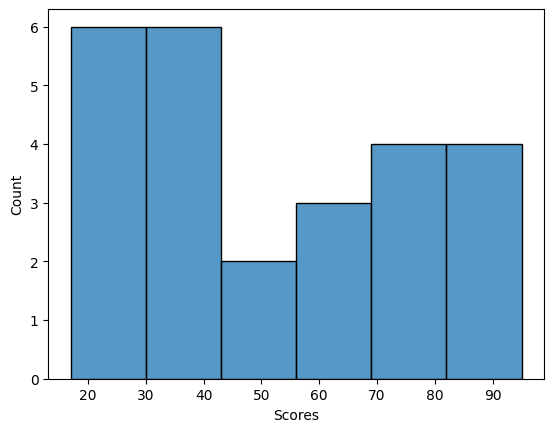

In [23]:
sns.histplot(scores)

### Linear Regression:

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

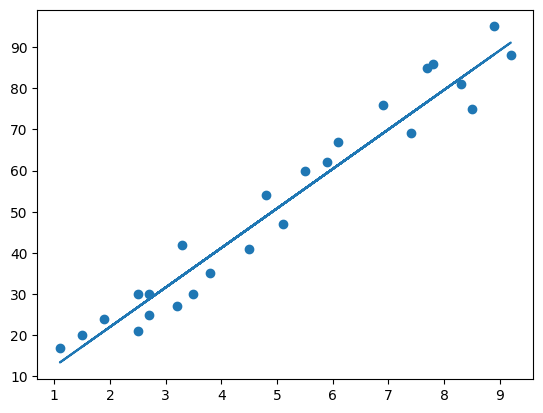

In [14]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [15]:
y_pred = reg.predict(x_test)
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


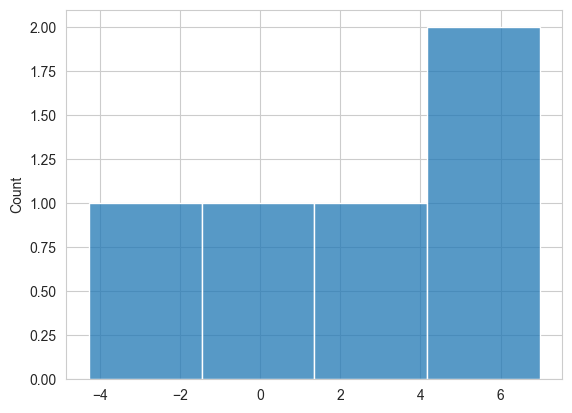

In [17]:
sns.set_style('whitegrid')
sns.histplot(np.array(y_test-y_pred))
plt.show()

**What would be the predicted score if a student studies for 9.25 hours/day?**

In [18]:
h=9.25
s=reg.predict([[h]])
print(f"If a student studies for {h} hours per day he/she will score {s}% in exams.")

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.


**Model Evaluation:**

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
